<a href="https://colab.research.google.com/github/prashants975/Projects_on_ML/blob/master/Image_classification_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
type(fashion_mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


Shape of the images are (28,28) and there are 60000 training examples.

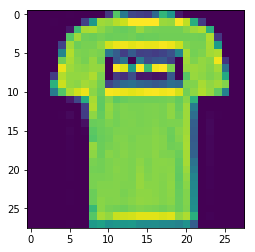

In [7]:
plt.imshow(train_images[1]) #image at index 1 our train set

In [8]:
df = pd.DataFrame(train_labels)
df[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

10 different labels are present and the data is distributed proportionally so no need to stratify it.
## Normalizing the image vectors

In [0]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),#input layer
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)#output 10 option for labels
])

W0629 19:20:18.165995 140684014380928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2569 - acc: 0.9042
Epoch 2/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2473 - acc: 0.9081
Epoch 3/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2373 - acc: 0.9112
Epoch 4/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2289 - acc: 0.9135
Epoch 5/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2230 - acc: 0.9161
Epoch 6/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2132 - acc: 0.9200
Epoch 7/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2102 - acc: 0.9206
Epoch 8/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2030 - acc: 0.9236
Epoch 9/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1970 - acc: 0.9259
Epoch 10/50
60000/60000 [==============================] - 4s 66us/sample - loss: 

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.5574 - acc: 0.8859


[0.557443649534136, 0.8859]